In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [23]:
# import data 
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [24]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [25]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [27]:
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [29]:
Y_pred = regressor.predict(X_test)

In [30]:
Y_pred

array([168.59399961,  82.46199965, 115.81730056, 127.57540054,
       120.70670161, 154.93179713, 150.34309943, 126.09460033,
       117.42119864, 125.95700046, 116.71860122, 172.30630065,
       141.58479876, 167.62069851, 115.12969998, 117.68990049,
       139.44390259, 170.10880014, 159.65250287, 157.99239953,
       155.2035003 , 125.45920056, 176.8482998 , 157.10920275,
       125.1224005 ,  93.72219988,  77.45719992, 120.89799968,
       119.13459925, 167.60059983,  88.26350078, 125.39700039,
        91.1177008 , 117.72470027, 121.16959914, 136.13420078,
       115.58980122, 115.36510059, 148.11390033, 107.19260102,
       104.22230235,  87.24669786, 126.51870057, 118.03829975,
       151.56279926, 119.67380023, 108.25580057, 108.22449782,
        93.14010029, 127.1259978 ,  75.03750034, 113.74549924,
       121.29120014, 111.17419922, 118.88509863, 121.10539915,
       157.91260047, 167.53670103, 146.92469679,  85.75009865,
        94.30590028,  86.77379875,  90.46039999, 119.01

In [32]:
# Calculating R squared error
error_score = metrics.r2_score(Y_test,Y_pred)
print("R squared error : ", error_score)

R squared error :  0.9890655138750364


In [33]:
MSE = np.square(np.subtract(Y_test,Y_pred)).mean()
print("MSE squared error : ", MSE)

MSE squared error :  5.767323639599029


In [34]:
#Comparing actual values with predicted values
Y_test = list(Y_test)

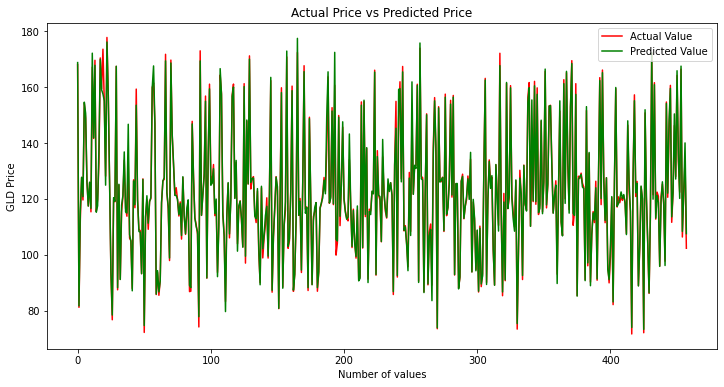

In [35]:
plt.figure(figsize = (12,6))
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()